# Classify Text into Labels

Link to the original tutorial: [LangChain Classification](https://python.langchain.com/docs/tutorials/classification/)


## Tagging means labeling a document with classes such as:

- Sentiment
- Language
- Style (formal, informal etc.)
- Covered topics
- Political tendency


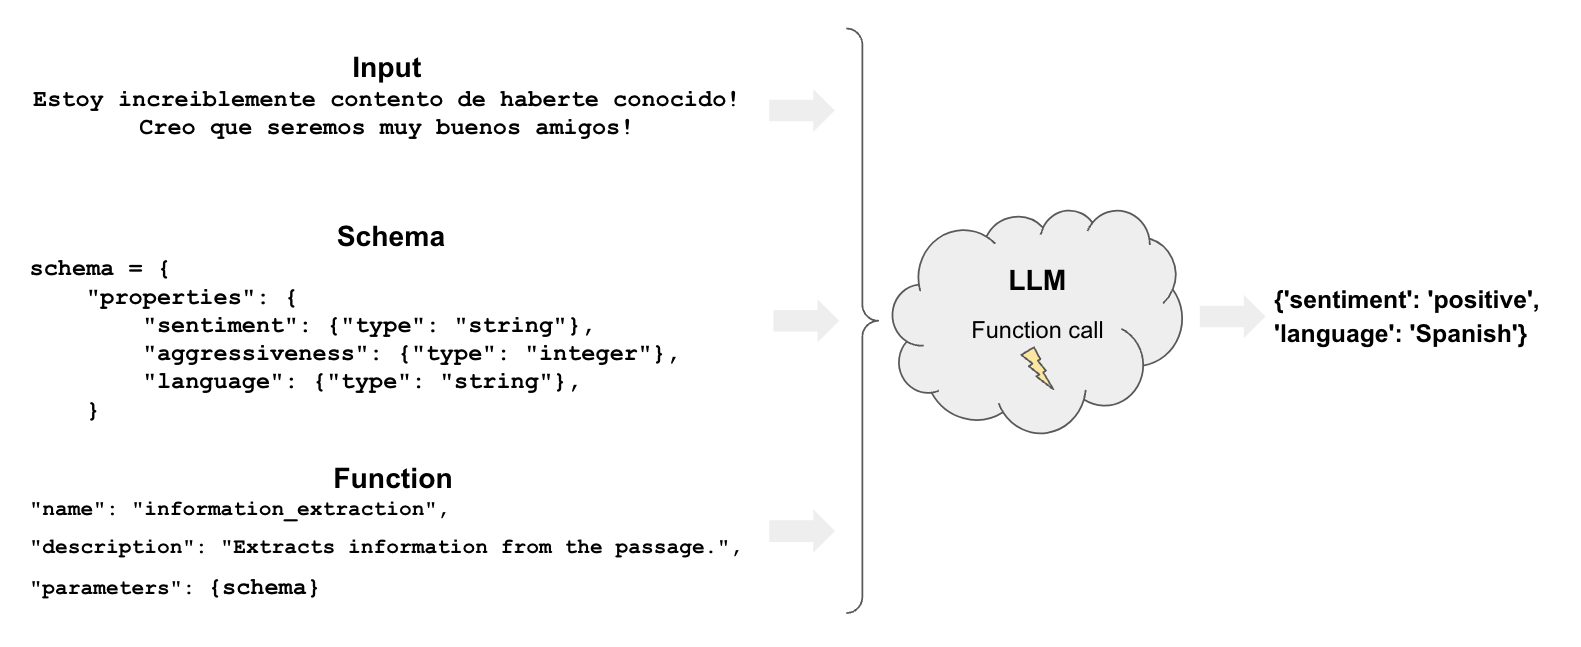


## Tagging has a few components:

- `function`: Like `extraction`, tagging uses `functions` to specify how the model should tag a document
- `schema`: defines how we want to tag the document


In [1]:
%pip install --upgrade --quiet langchain-core

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -qU langchain-openai



In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

## Pydantic

Let's specify a Pydantic model with a few properties and their expected type in our schema.


In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field

tagging_prompt = ChatPromptTemplate.from_template(
    """
Extract the desired information from the following passage.

Only extract the properties mentioned in the 'Classification' function.

Passage:
{input}
"""
)


class Classification(BaseModel):
    sentiment: str = Field(description="The sentiment of the text")
    aggressiveness: int = Field(
        description="How aggressive the text is on a scale from 1 to 10"
    )
    language: str = Field(description="The language the text is written in")


# LLM
llm = ChatOpenAI(temperature=0, model="gpt-4o-mini").with_structured_output(
    Classification
)

In [5]:
inp = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"
prompt = tagging_prompt.invoke({"input": inp})
response = llm.invoke(prompt)

response

Classification(sentiment='positive', aggressiveness=1, language='Spanish')

In [6]:
inp = "Estoy muy enojado con vos! Te voy a dar tu merecido!"
prompt = tagging_prompt.invoke({"input": inp})
response = llm.invoke(prompt)

response.dict()

C:\Users\Asus\AppData\Local\Temp\ipykernel_25356\378064834.py:5: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response.dict()


{'sentiment': 'enojado', 'aggressiveness': 8, 'language': 'es'}

## Finer control

Careful schema definition gives us more control over the model's output.

Specifically, we can define:

- Possible values for each property
- Description to make sure that the model understands the property
- Required properties to be returned


In [7]:
class Classification(BaseModel):
    sentiment: str = Field(..., enum=["happy", "neutral", "sad"])
    aggressiveness: int = Field(
        ...,
        description="describes how aggressive the statement is, the higher the number the more aggressive",
        enum=[1, 2, 3, 4, 5],
    )
    language: str = Field(
        ..., enum=["spanish", "english", "french", "german", "italian"]
    )

In [8]:
tagging_prompt = ChatPromptTemplate.from_template(
    """
Extract the desired information from the following passage.

Only extract the properties mentioned in the 'Classification' function.

Passage:
{input}
"""
)

llm = ChatOpenAI(temperature=0, model="gpt-4o-mini").with_structured_output(
    Classification
)

In [9]:
inp = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"
prompt = tagging_prompt.invoke({"input": inp})
llm.invoke(prompt)

Classification(sentiment='happy', aggressiveness=1, language='spanish')

In [10]:
inp = "Estoy muy enojado con vos! Te voy a dar tu merecido!"
prompt = tagging_prompt.invoke({"input": inp})
llm.invoke(prompt)

Classification(sentiment='sad', aggressiveness=5, language='spanish')

In [11]:
inp = "Weather is ok here, I can go outside without much more than a coat"
prompt = tagging_prompt.invoke({"input": inp})
llm.invoke(prompt)

Classification(sentiment='happy', aggressiveness=1, language='english')

## LangSmith Trace


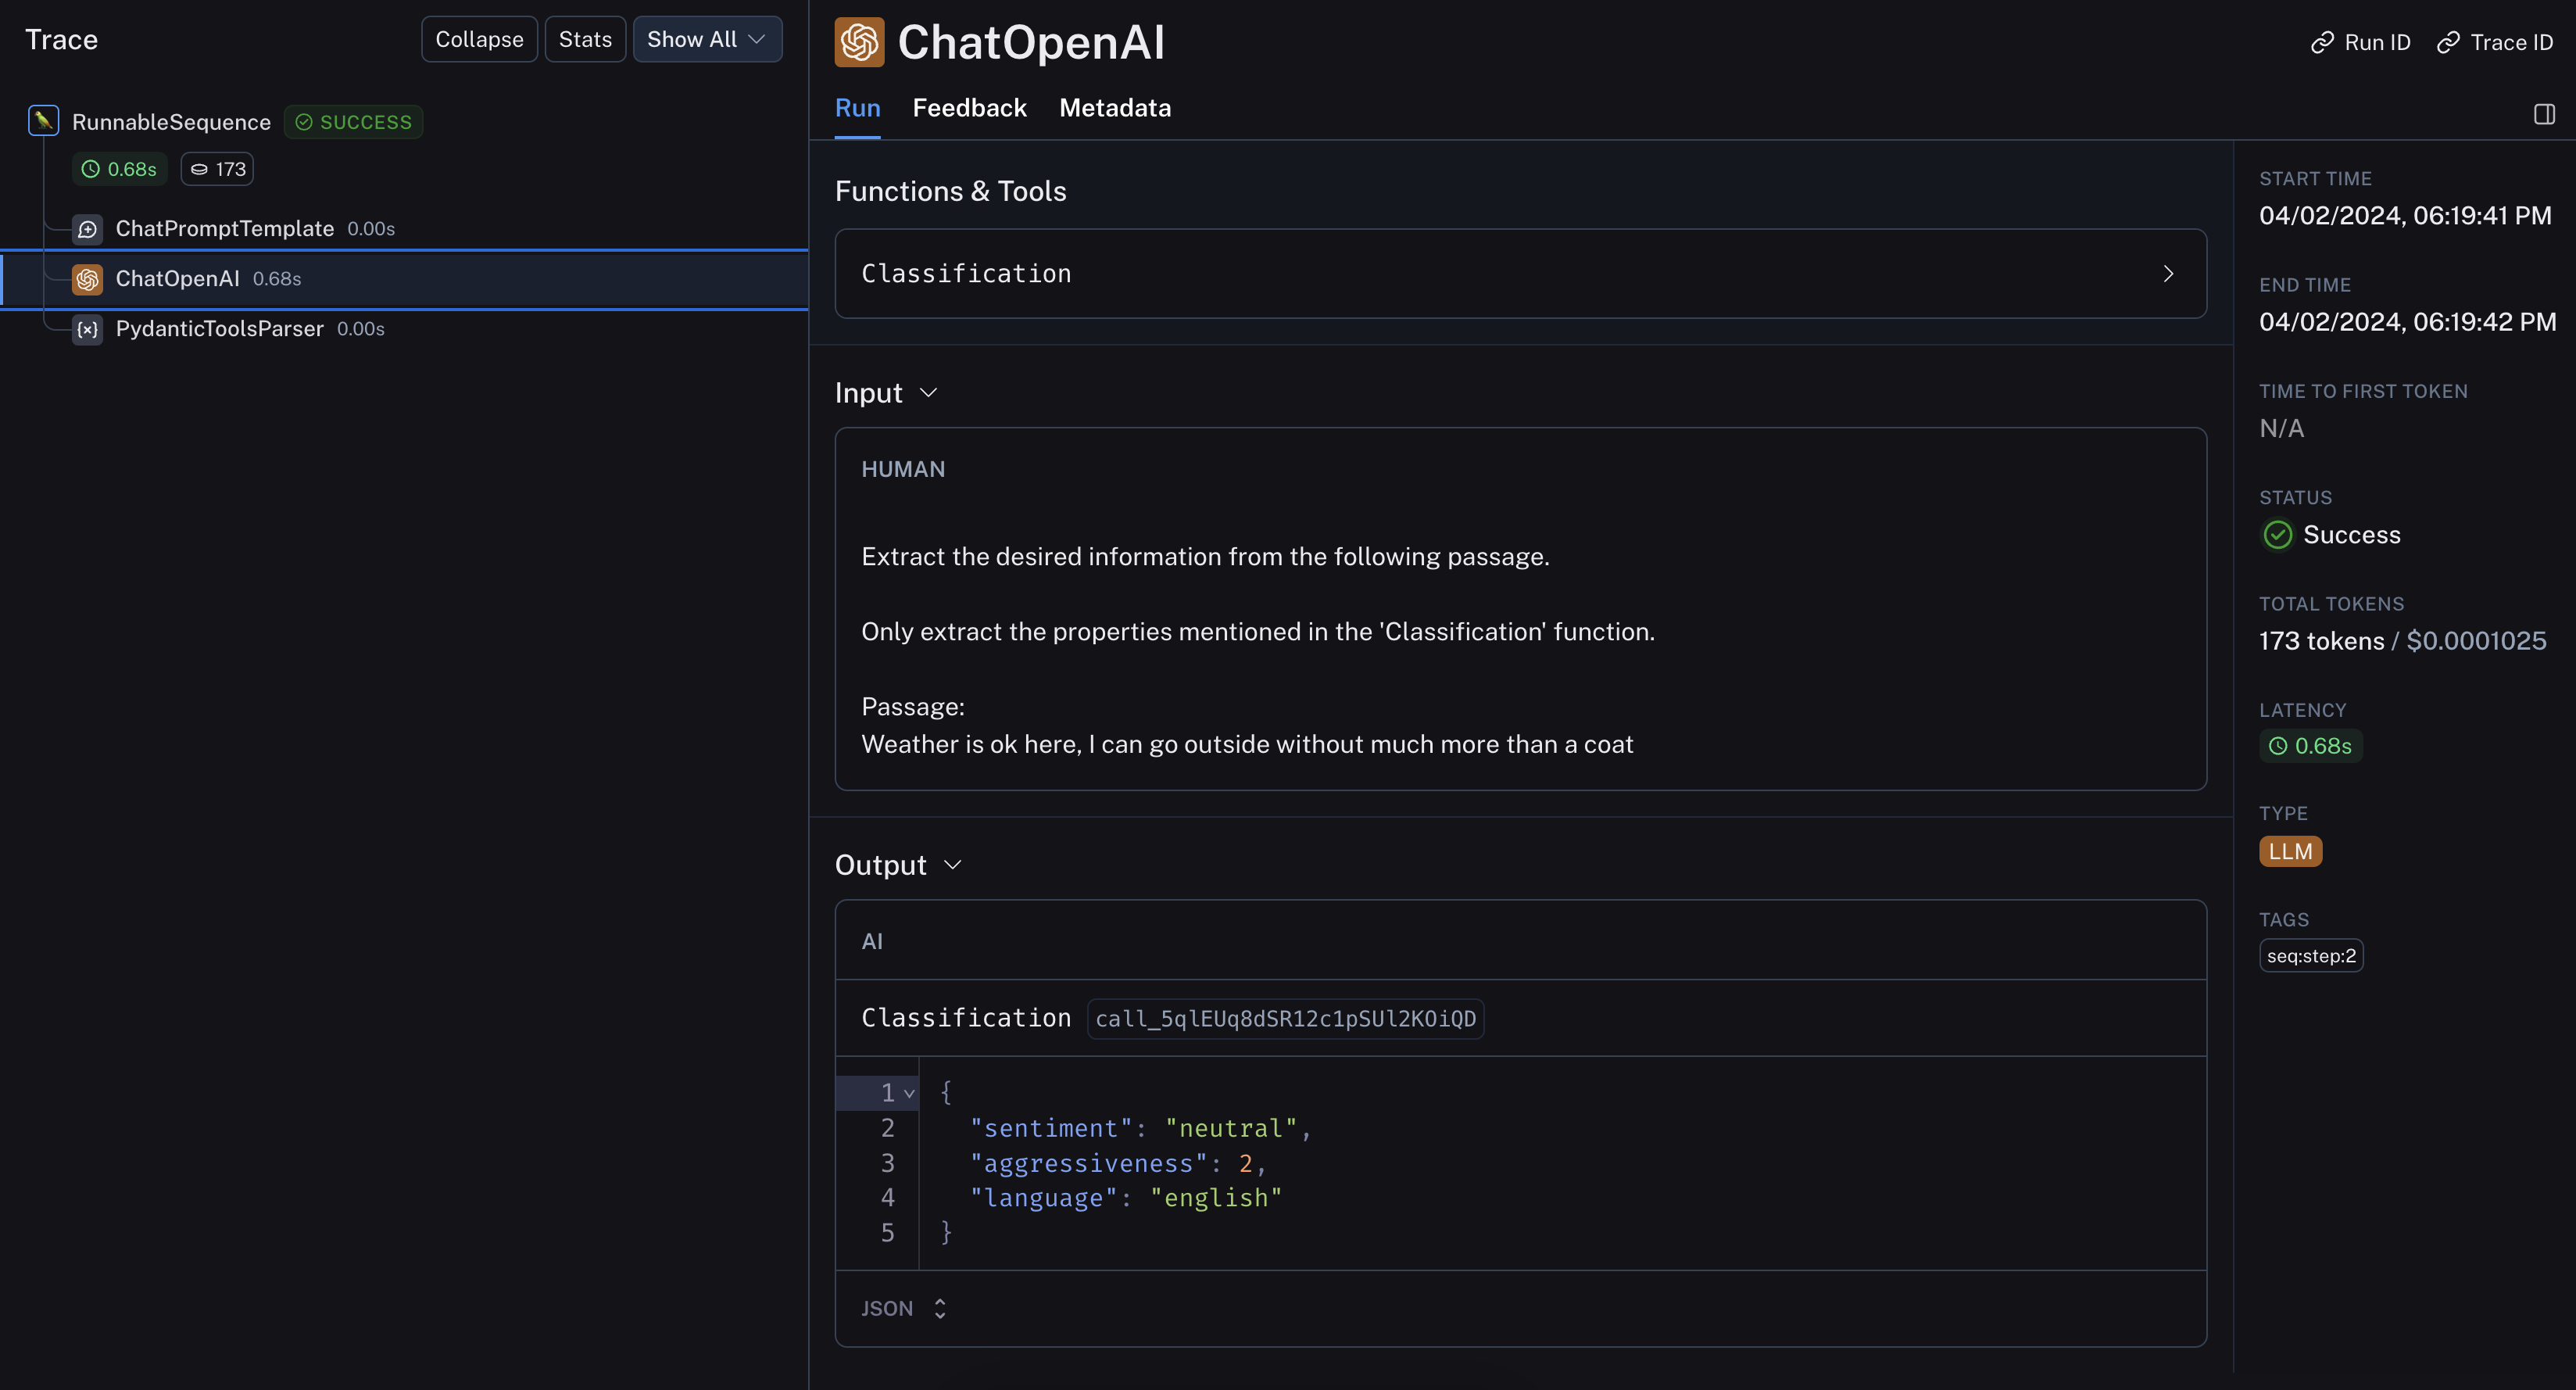


## Going deeper

- You can use the `metadata tagger` document transformer to extract metadata from a LangChain `Document`.
- This covers the same basic functionality as the tagging chain, only applied to a LangChain `Document`.
